### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### READ DATA

In [2]:
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#to print unique values
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
replace_cols = ['InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
for i in replace_cols:
    churn_df[i]=churn_df[i].replace({'No internet service':'No'})

In [9]:
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
churn_df.shape

(7043, 21)

### DATA DESCRIPTION

In [11]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### DATA SUMMARY

In [12]:
print("Telecom Churn Analysis Summary\n")
print("Rows:",churn_df.shape[0])
print("\nColumns:",churn_df.shape[1])
print("\nFeatures:\n",churn_df.columns.to_list())
print("\nMissin Values:\n",churn_df.isnull().sum())
print("\nUnique Values:\n",churn_df.nunique())

Telecom Churn Analysis Summary

Rows: 7043

Columns: 21

Features:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missin Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique Values:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2

In [13]:
churn_df['Churn'].value_counts(sort=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
churn_df.InternetService.value_counts(sort=False)

No             1526
DSL            2421
Fiber optic    3096
Name: InternetService, dtype: int64

### DATA ANALYSIS

In [15]:
final_df = churn_df.drop(columns=['customerID','PaperlessBilling','PaymentMethod','Dependents','Partner'])

In [16]:
final_df.shape

(7043, 16)

In [17]:
pd.crosstab(final_df.SeniorCitizen,[final_df['gender'],final_df['Churn']],margins=True)

gender        Female       Male        All
Churn             No  Yes    No  Yes      
SeniorCitizen                             
0               2221  699  2287  694  5901
1                328  240   338  236  1142
All             2549  939  2625  930  7043

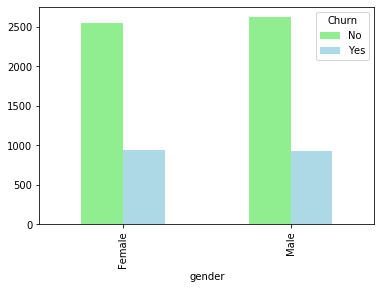

In [18]:
pd.crosstab(final_df['gender'],final_df['Churn']).plot(kind='bar',color =['lightgreen','lightblue'])

### DATA VISUALIZATION

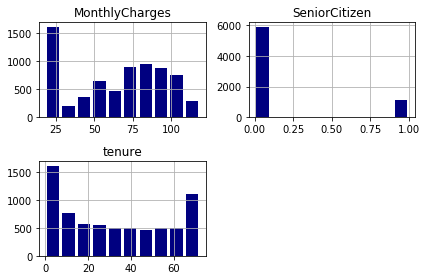

In [19]:
final_df.hist(rwidth=0.8,color='navy')
plt.tight_layout()

In [20]:
lab = final_df["Churn"].value_counts().keys().tolist()
val = final_df["Churn"].value_counts().values.tolist()
colors =  ['lightgreen', 'lightcyan']

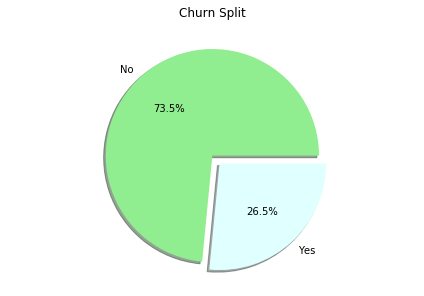

In [21]:
plt.axis("equal")
plt.pie(val,
        labels = lab ,
        shadow=True, autopct='%1.1f%%',radius=1.0,explode=[0,0.1],colors = colors)

plt.tight_layout()
plt.title('Churn Split')
plt.show()

In [22]:
print("labels:",lab)
print("values:",val)

labels: ['No', 'Yes']
values: [5174, 1869]


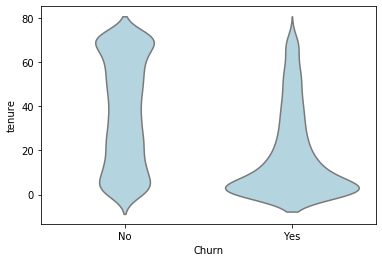

In [23]:
g = sns.violinplot(x="Churn", y="tenure", data=final_df, inner=None,color="lightblue")

C:\Users\vishn\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


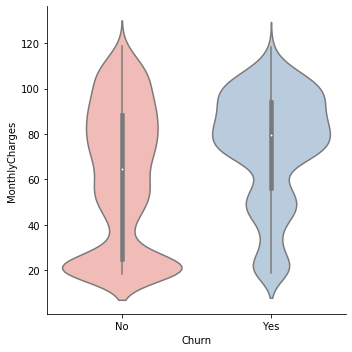

In [24]:
g= sns.factorplot( x="Churn", 
             y="MonthlyCharges",
             data=final_df,
             kind='violin',palette = "Pastel1")
#g.set_yticks(np.arange(0,80,10))

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
final_df = final_df.apply(LabelEncoder().fit_transform)
final_df

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,0,0,0,142,2505,0
1,1,0,34,1,0,0,1,0,1,0,0,0,1,498,1466,0
2,1,0,2,1,0,0,1,1,0,0,0,0,0,436,157,1
3,1,0,45,0,1,0,1,0,1,1,0,0,1,266,1400,0
4,0,0,2,1,0,1,0,0,0,0,0,0,0,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,24,1,2,0,1,0,1,1,1,1,1,991,1597,0
7039,0,0,72,1,2,1,0,1,1,0,1,1,1,1340,5698,0
7040,0,0,11,0,1,0,1,0,0,0,0,0,0,137,2994,0
7041,1,1,4,1,2,1,0,0,0,0,0,0,0,795,2660,1


In [27]:
final_df.shape

(7043, 16)

In [28]:
final_df.nunique()

gender                 2
SeniorCitizen          2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [29]:
final_corr = final_df.corr()
final_corr

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.006488,-0.006739,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,0.008576,0.146185,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.219524,0.037653,0.150889
tenure,0.005106,0.016567,1.000000,0.008448,0.343032,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.268133,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.008448,1.000000,-0.020538,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.271209,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.343032,-0.020538,1.000000,-0.109216,0.131128,0.226910,0.231661,0.134768,0.274823,0.279727,0.110842,0.444580,0.114955,0.038037
InternetService,-0.000863,-0.032310,-0.030359,0.387436,-0.109216,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.244965,-0.055724,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.327203,-0.092893,0.131128,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,0.278570,0.118498,-0.171226
OnlineBackup,-0.013773,0.066572,0.360277,-0.052312,0.226910,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.436212,0.158445,-0.082255
DeviceProtection,-0.002105,0.059428,0.360653,-0.071227,0.231661,-0.306805,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.219310,0.481576,0.172564,-0.066160
TechSupport,-0.009212,-0.060625,0.324221,-0.096340,0.134768,-0.389382,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.293691,0.325970,0.132505,-0.164674


Text(114.0, 0.5, 'truth')

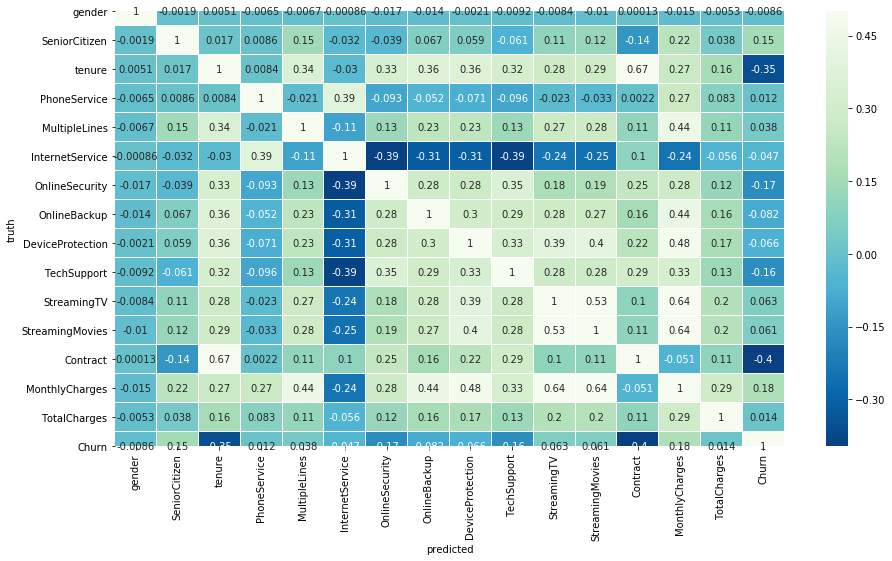

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(final_corr,annot=True,linecolor='white',vmax=0.5,linewidths=0.1,cmap="GnBu_r")#plt.cm.GnBu_r)
plt.xlabel('predicted')
plt.ylabel('truth')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.26484752, 0.26217228, 0.25361156, 0.27233815, 0.26431248,
        0.26859283, 0.26003212, 0.24451578, 0.26752275, 0.26217228,
        0.2541466 , 0.26056716, 1.        , 0.26056716, 0.2541466 ,
        0.26217228, 0.26752275, 0.24451578, 0.26003212, 0.26859283,
        0.26431248, 0.27233815, 0.25361156, 0.26217228, 0.26484752],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x2791219c388>)

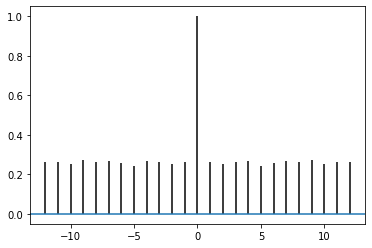

In [31]:
#finding autocorrelation
plt.acorr(pd.to_numeric(final_df.Churn,downcast='float'),maxlags=12)

### SPLITTING AND SCALING

In [32]:
x = final_df.drop(columns=['Churn'])
y = final_df['Churn']

In [33]:
x.shape

(7043, 15)

In [34]:
y.shape

(7043,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.33)

In [36]:
stdsclr = StandardScaler()
x_train_std = stdsclr.fit_transform(x_train)
x_test_std = stdsclr.fit_transform(x_test)

In [37]:
x_train

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
6476,1,0,53,1,2,0,1,1,0,1,0,0,1,611,3026
1216,1,0,54,1,0,2,0,0,0,0,0,0,2,37,180
5245,0,0,70,1,0,2,0,0,0,0,0,0,2,32,752
1167,1,0,26,1,2,0,0,0,0,0,0,0,1,407,538
6608,1,0,22,1,0,0,0,1,0,1,0,0,1,462,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,0,0,12,1,2,2,0,0,0,0,0,0,2,97,2382
4135,0,0,36,1,2,0,1,1,1,1,1,1,2,1147,2932
981,1,0,40,1,0,2,0,0,0,0,0,0,2,21,6050
1906,1,0,40,0,1,0,0,1,0,1,0,0,1,207,692


In [38]:
x_train_std

array([[ 0.983602  , -0.43716513,  0.82807121, ...,  0.36731058,
        -0.15990545, -0.11686893],
       [ 0.983602  , -0.43716513,  0.86882987, ...,  1.56576929,
        -1.35863285, -1.62921164],
       [-1.01667138, -0.43716513,  1.52096844, ...,  1.56576929,
        -1.36907473, -1.3252552 ],
       ...,
       [ 0.983602  , -0.43716513,  0.29820861, ...,  1.56576929,
        -1.39204686,  1.49006163],
       [ 0.983602  , -0.43716513,  0.29820861, ...,  0.36731058,
        -1.00360906, -1.35713875],
       [ 0.983602  ,  2.28746512, -0.51696461, ..., -0.83114814,
         1.0262917 , -0.9415899 ]])

In [39]:
y_test.shape

(2325,)

### MODEL BUILDING AND COMPARISON

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [41]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [42]:
results = []
names = []
for name,model in models:
    kfold = KFold( n_splits=10, random_state=7 )
    cv_results = cross_val_score(model, x_train_std, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR 0.797584 (0.012763)
DTC 0.713436 (0.019801)


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFC 0.775328 (0.022542)
NB 0.765359 (0.019110)


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM 0.793341 (0.011720)


### MODEL SVM

In [43]:
model = SVC()
model.fit(x_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
svmscore = model.score(x_train_std,y_train)
svmscore

0.8153878762187368

In [45]:
y_predicted = model.predict(x_test_std)
y_predicted

array([0, 1, 0, ..., 1, 0, 0])

In [46]:
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1699
           1       0.70      0.47      0.56       626

    accuracy                           0.80      2325
   macro avg       0.76      0.70      0.72      2325
weighted avg       0.79      0.80      0.79      2325



#### CONFUSION METRICS AND HEAT MAP

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[1573,  126],
       [ 333,  293]], dtype=int64)

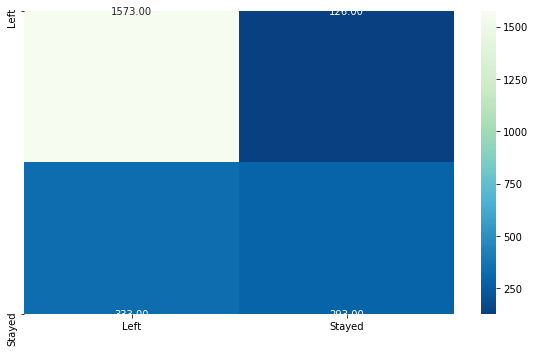

In [48]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,cmap="GnBu_r",fmt='.2f',
            xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
plt.tight_layout()

### MODEL LOGISTIC REGRESSION

In [49]:
model = LogisticRegression()
model.fit(x_train_std,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lrscore = model.score(x_train_std,y_train)
lrscore

0.7992793556591776

In [51]:
y_lrpredicted = model.predict(x_test_std)
y_lrpredicted

array([0, 1, 1, ..., 1, 0, 0])

In [52]:
report = classification_report(y_test,y_lrpredicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1699
           1       0.68      0.52      0.59       626

    accuracy                           0.81      2325
   macro avg       0.76      0.72      0.73      2325
weighted avg       0.80      0.81      0.80      2325



#### CONFUSION METRICS AND HEAT MAP

In [53]:
lcm = confusion_matrix(y_test,y_lrpredicted)
lcm

array([[1547,  152],
       [ 299,  327]], dtype=int64)

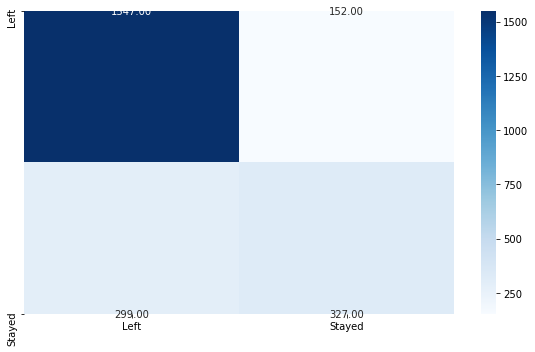

In [54]:
plt.figure(figsize=(8,5))
sns.heatmap(lcm, annot=True, cmap="Blues",fmt='.2f',linecolor='white',
            xticklabels=["Left","Stayed"],yticklabels=["Left","Stayed"])
#plt.xlabel('predicted')
#plt.ylabel('truth')
plt.tight_layout()

### MODEL DECISION TREE CLASSIFIER

In [55]:
model = DecisionTreeClassifier()
model.fit(x_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
dtscore = model.score(x_train_std,y_train)
dtscore

0.9955489614243324

In [57]:
y_dtpredicted = model.predict(x_test_std)
y_dtpredicted

array([0, 1, 0, ..., 0, 0, 0])

In [58]:
report = classification_report(y_test,y_dtpredicted)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1699
           1       0.49      0.46      0.47       626

    accuracy                           0.73      2325
   macro avg       0.65      0.64      0.64      2325
weighted avg       0.72      0.73      0.72      2325



### RANDOM FOREST CLASSIFIER

In [59]:
model = RandomForestClassifier()
model.fit(x_train_std,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rfcscore = model.score(x_train_std,y_train)
rfcscore

0.9762611275964391

In [61]:
y_rfcpredicted = model.predict(x_test_std)
y_rfcpredicted

array([0, 1, 0, ..., 0, 1, 0])

In [62]:
report = classification_report(y_test,y_rfcpredicted)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1699
           1       0.65      0.43      0.52       626

    accuracy                           0.78      2325
   macro avg       0.73      0.67      0.69      2325
weighted avg       0.77      0.78      0.77      2325



### FEATURE IMPORTANCE

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train_std,y_train)
print(model.feature_importances_)

[0.03565689 0.0276788  0.18706563 0.00566545 0.02147618 0.05062144
 0.03279528 0.02889421 0.02262087 0.02796696 0.02477421 0.02212757
 0.10954094 0.20604052 0.19707505]


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### IMPROVING PERFORMANCE BY COMPARISON

In [64]:
estimators = []
model1 = LogisticRegression()
estimators.append(('Logistic',model1))
model2 = DecisionTreeClassifier()
estimators.append(('DTC',model2))
model3 = SVC()
estimators.append(('SVM',model3))
model4 = RandomForestClassifier()
estimators.append(('RFC',model4))

In [65]:
names=[]
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble,x_train_std,y_train,cv=kfold)
names.append(name)
print(name,results.mean())

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn

SVM 0.7907949188527834


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### SAVE PROJECT

In [66]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model3,file)

### REPORT

In [67]:
report = pd.DataFrame({
    "Model":['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVM'],#'GaussianNB',
    "Score":[lrscore,dtscore,rfcscore,svmscore],
    "Cross_Val_Score":['0.807321','0.739714','0.782109','0.801601']
})
report

,Model,Score,Cross_Val_Score
0,LogisticRegression,0.799279,0.807321
1,DecisionTreeClassifier,0.995549,0.739714
2,RandomForestClassifier,0.976261,0.782109
3,SVM,0.815388,0.801601


### --------------------------------------------------------------------------------------------------------------------------------------------------------------